In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree as tree
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Spliting datasets

In [39]:
train_set = pd.read_csv('train_new.csv')
test_set = pd.read_csv('test_new.csv')

In [40]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,1,0,3,1,1,0,0,-0.565736,-0.502445
1,2,1,1,0,1,0,1,0.663861,0.786845
2,3,1,3,0,0,0,0,-0.258337,-0.488854
3,4,1,1,0,1,0,0,0.433312,0.420730
4,5,0,3,1,0,0,0,0.433312,-0.486337


In [96]:
x_train = train_set[['Pclass','Sex','SibSp','Parch','Embarked','Age','Fare']]
y_train = train_set['Survived']

In [42]:
test_set.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,892,3,1,0,0,2,0.386231,-0.497071
1,893,3,0,1,0,0,1.371370,-0.511934
2,894,2,1,0,0,2,2.553537,-0.463762
3,895,3,1,0,0,0,-0.204852,-0.482135
4,896,3,0,1,1,0,-0.598908,-0.417159


In [99]:
y_test = pd.DataFrame(test_set['PassengerId'])
test_set.drop(['PassengerId'],axis=1,inplace=True)
x_test = test_set


test




In [44]:
x_train_m, x_test_m,y_train_m,y_test_m = train_test_split(x_train,y_train,test_size=0.25)

In [45]:
x_train_m.shape, x_test_m.shape

((668, 7), (223, 7))

In [46]:
m_test = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
m_test.fit(x_train_m,y_train_m)
prev = m_test.predict(x_test_m)
prev
mt.accuracy_score(y_test_m,prev)

0.7847533632286996

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


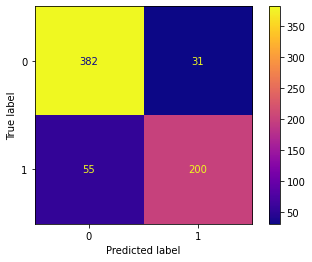

In [47]:
mt.plot_confusion_matrix(m_test,x_train_m,y_train_m,cmap='plasma')

In [48]:
print(mt.classification_report(y_test_m,prev))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       136
           1       0.72      0.72      0.72        87

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



## MACHINE LEARNING

#DecisionTree

In [49]:
model = tree.DecisionTreeClassifier()
cv_=[2,3,5,10,15]
parameters = {'criterion':['gini','entropy'], 'max_depth':[1,2,5,10]}
for num in cv_:
  clf = GridSearchCV(model,param_grid=parameters,cv=num);
  clf.fit(x_train,y_train);
  print(f'cv: {num} Parameter: {clf.best_params_}, best score {clf.best_score_}');

cv: 2 Parameter: {'criterion': 'entropy', 'max_depth': 5}, best score 0.7946062377185469
cv: 3 Parameter: {'criterion': 'gini', 'max_depth': 5}, best score 0.8058361391694726
cv: 5 Parameter: {'criterion': 'entropy', 'max_depth': 5}, best score 0.8136902893729208
cv: 10 Parameter: {'criterion': 'entropy', 'max_depth': 10}, best score 0.8104119850187266
cv: 15 Parameter: {'criterion': 'entropy', 'max_depth': 5}, best score 0.8138041431261769


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


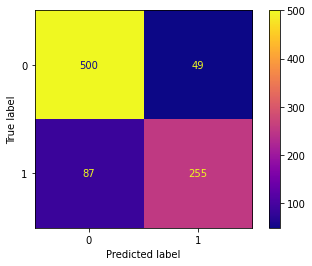

In [50]:
mt.plot_confusion_matrix(clf,x_train,y_train,cmap='plasma')

In [51]:
pred = clf.predict(x_train)

In [52]:
mt.accuracy_score(y_train,pred)

0.8473625140291807

#Random Forest

In [53]:
model_2 = RandomForestClassifier()
#cv -> KFold divisions
cv_=[2,3,5,10,15]
parameters = {'n_estimators':[30,50,100,150],'criterion':['gini','entropy'], 'max_depth':[1,2,5,10]}
for num in cv_:
  clf_2 = GridSearchCV(model_2,param_grid=parameters,cv=num);
  clf_2.fit(x_train,y_train);
  print(f'cv: {num} Parameter: {clf_2.best_params_}, best score {clf_2.best_score_}');


cv: 2 Parameter: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}, best score 0.8125736887186981
cv: 3 Parameter: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}, best score 0.829405162738496
cv: 5 Parameter: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}, best score 0.8316615403929445
cv: 10 Parameter: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}, best score 0.8384394506866416
cv: 15 Parameter: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 150}, best score 0.8419020715630885


In [54]:
pred = clf_2.predict(x_train)

In [55]:
mt.accuracy_score(y_train,pred)

0.9337822671156004

In [56]:
rf = RandomForestClassifier()

In [57]:
#x_train_2 =x_train
#x_train_2['pred'] = pred
#sns.countplot(x_train_2['Sex'].loc[x_train_2['pred']==1])

#KNN

In [58]:
model_3 = KNeighborsClassifier()
cv_=[2,3,5,10,15]
parameters = {'metric':['euclidean','minkowski','chebyshev'], 'n_neighbors':[3,5,10]}
for num in cv_:
  clf_3 = GridSearchCV(model_3,param_grid=parameters,cv=num);
  clf_3.fit(x_train,y_train);
  print(f'cv: {num} Parameter: {clf_3.best_params_}, best score {clf_3.best_score_}');

cv: 2 Parameter: {'metric': 'euclidean', 'n_neighbors': 5}, best score 0.7867587040862599
cv: 3 Parameter: {'metric': 'euclidean', 'n_neighbors': 10}, best score 0.7923681257014591
cv: 5 Parameter: {'metric': 'euclidean', 'n_neighbors': 5}, best score 0.7912685958194714
cv: 10 Parameter: {'metric': 'euclidean', 'n_neighbors': 5}, best score 0.8024843945068664
cv: 15 Parameter: {'metric': 'euclidean', 'n_neighbors': 5}, best score 0.811563088512241


In [59]:
pred = clf_3.predict(x_train)

In [60]:
np.unique(pred,return_counts=True)

(array([0, 1]), array([564, 327]))

In [61]:
mt.accuracy_score(y_train,pred)

0.8597081930415263

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


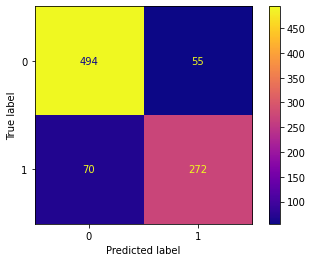

In [68]:
mt.plot_confusion_matrix(clf_3,x_train,y_train,cmap='plasma')

#SVC

In [63]:
model_4 = SVC()
cv_=[2,5,10]
parameters = {'kernel':['linear','rbf','poly','sigmoid'],'C': [1,1.5,2]}
for num in cv_:
  clf_4 = GridSearchCV(model_4,param_grid=parameters,cv=num);
  clf_4.fit(x_train,y_train);
  print(f'cv: {num} Parameter: {clf_4.best_params_}, best score {clf_4.best_score_}');

cv: 2 Parameter: {'C': 1.5, 'kernel': 'rbf'}, best score 0.8181866277019196
cv: 5 Parameter: {'C': 2, 'kernel': 'rbf'}, best score 0.8293955181721172
cv: 10 Parameter: {'C': 1, 'kernel': 'rbf'}, best score 0.8271785268414483


In [64]:
pred = clf_4.predict(x_train)

In [65]:
mt.accuracy_score(y_train,pred)

0.8316498316498316

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


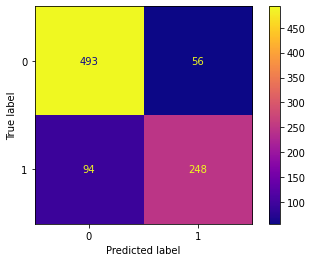

In [66]:
mt.plot_confusion_matrix(clf_4,x_train,y_train,cmap='plasma')

In [67]:
x_train

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,3,1,1,0,0,-0.565736,-0.502445
1,1,0,1,0,1,0.663861,0.786845
2,3,0,0,0,0,-0.258337,-0.488854
3,1,0,1,0,0,0.433312,0.420730
4,3,1,0,0,0,0.433312,-0.486337
...,...,...,...,...,...,...,...
886,2,1,0,0,0,-0.181487,-0.386671
887,1,0,0,0,0,-0.796286,-0.044381
888,3,0,1,2,0,-0.104637,-0.176263
889,1,1,0,0,1,-0.258337,-0.044381


Final Predict

In [100]:
pred_final = clf_4.predict(x_test)
x_test['Survived'] = pred_final
np.unique(x_test['Survived'], return_counts=True)


(array([0, 1]), array([263, 155]))

In [101]:
y_test['Survived'] = pred_final
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [103]:
y_test.to_csv('final_SVM.csv',index=False)